In [204]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Problem 1: Obtaining a dataset

In [205]:
df = pd.read_csv('Data/train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Problem 2: Investigation of the dataset itself

The Ames Housing dataset was compiled by Dean De Cock for use in data science education. It's an incredible alternative for data scientists looking for a modernized and expanded version of the often cited Boston Housing dataset. 
The GOAL is to evaluate the price of Housing and predict the Sale Value

# Problem 3: Checking the data

In [206]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [207]:
print("Numerical data",len(df.dtypes[df.dtypes != "object"].index))

print("Text data",len(df.dtypes[df.dtypes == "object"].index))

Numerical data 38
Text data 43


In [208]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [209]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


The target cells are **ID** and **SalePrice**.

# Problem 4: Dealing with missing values

In [210]:
!pip install missingno

<Axes: >

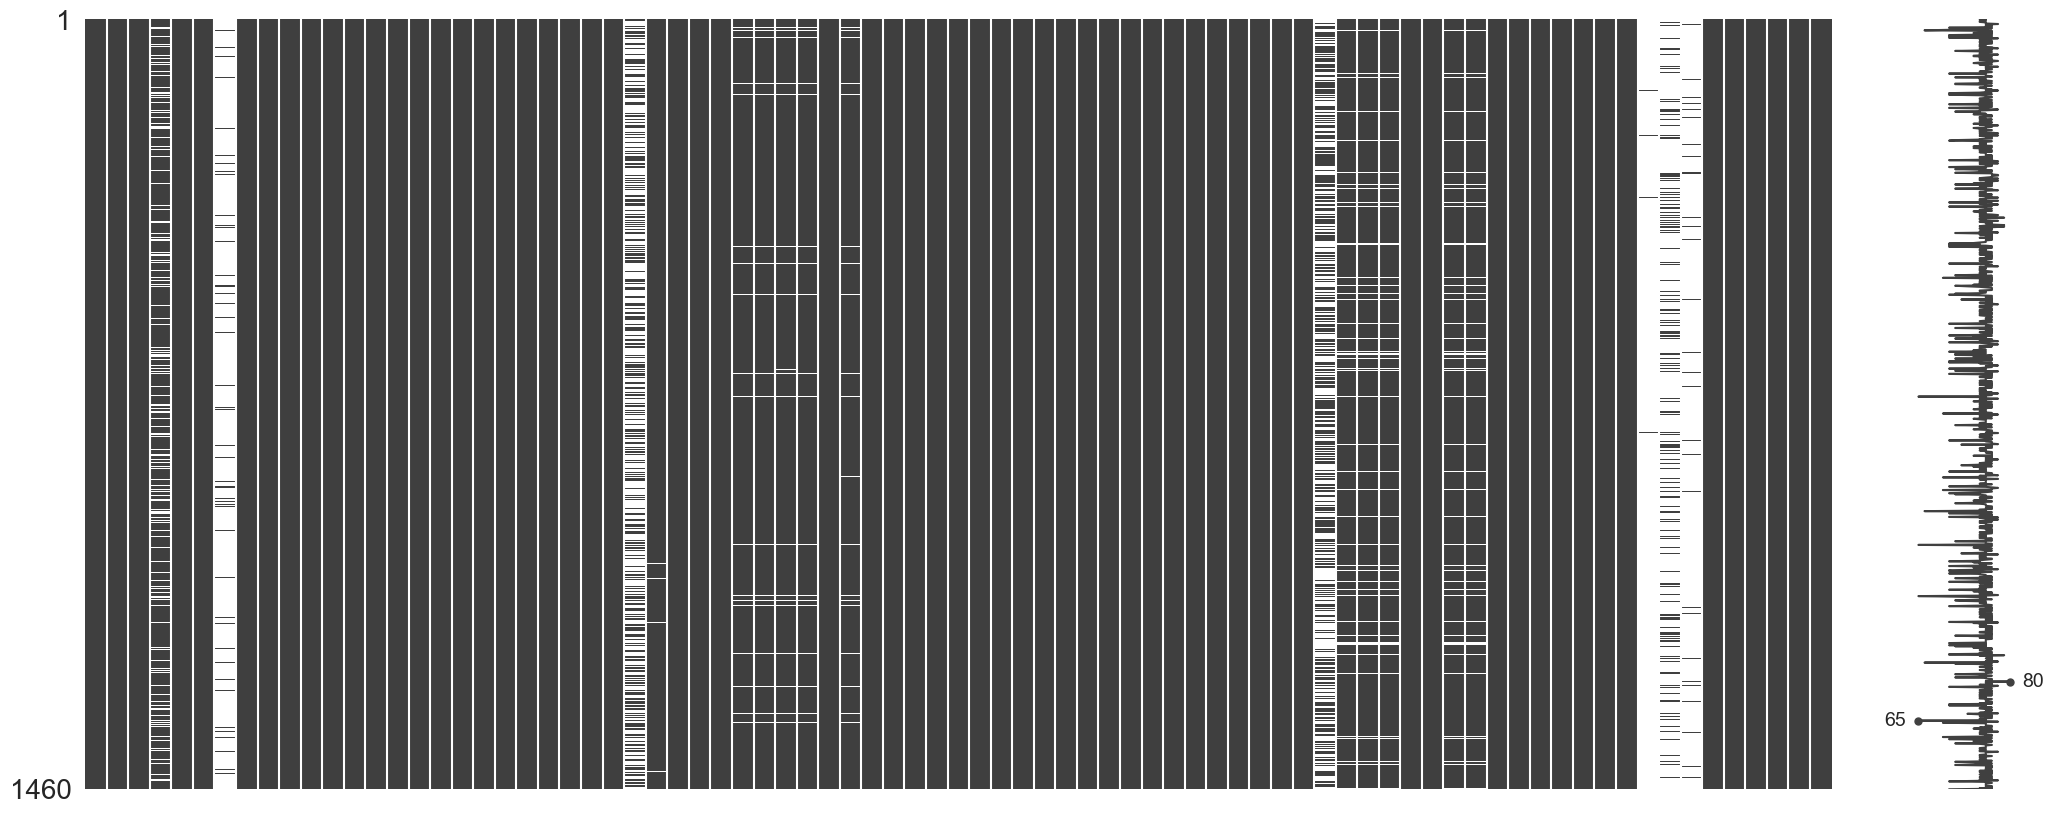

In [211]:
import missingno as msno
%matplotlib inline
msno.matrix(df.sample(1460))

In [212]:
missing_table = pd.DataFrame({
    "Missing Count": df.isnull().sum(),
    "Missing %": ((df.isnull().sum() / len(df)) * 100)})

In [213]:
missing_table = missing_table.sort_values("Missing %", ascending=False)
missing_table

,Missing Count,Missing %
PoolQC,1453,99.520548
MiscFeature,1406,96.301370
Alley,1369,93.767123
Fence,1179,80.753425
MasVnrType,872,59.726027
...,...,...
ExterQual,0,0.000000
Exterior2nd,0,0.000000
Exterior1st,0,0.000000
RoofMatl,0,0.000000


In [214]:
# Deleting columns with more than 5 missing values
df = df.dropna(axis=1, thresh=len(df) - 5 + 1)

# reloading to check again
missing_table = pd.DataFrame({
    "Missing Count": df.isnull().sum(),
    "Missing %": ((df.isnull().sum() / len(df)) * 100)})
missing_table = missing_table.sort_values("Missing %", ascending=False)
missing_table

,Missing Count,Missing %
Electrical,1,0.068493
Fireplaces,0,0.000000
1stFlrSF,0,0.000000
2ndFlrSF,0,0.000000
LowQualFinSF,0,0.000000
...,...,...
BsmtFinSF1,0,0.000000
BsmtFinSF2,0,0.000000
BsmtUnfSF,0,0.000000
TotalBsmtSF,0,0.000000


In [215]:
df = df[df.columns[df.isnull().sum() < 5]]
df = df.dropna(axis=0)

df

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


# Problem 5: Researching terminology


### Skewness — How asymmetric the data is
**Definition:** A measure of the asymmetry of a probability distribution.

Interpretation:
- Skewness = 0 → perfectly symmetric (e.g., a normal distribution).
- Positive skew (right-skewed) → long tail to the right, most data on the left.
- Negative skew (left-skewed) → long tail to the left, most data on the right.

In [216]:
df["SalePrice"].skew()

1.8819429948035529

### Kurtosis — How heavy or light the tails are
**Definition:** A measure of how the tails of the distribution compare to a normal distribution in terms of extreme values.

Interpretation:
- Kurtosis ≈ 3 (excess kurtosis ≈ 0) → normal-like tails.
- High kurtosis (>3) → heavier tails → more outliers/extreme values likely.
- Low kurtosis (<3) → lighter tails → fewer extreme values than normal.

In [217]:
df["SalePrice"].kurt()

6.529263049673958

# Problem 6

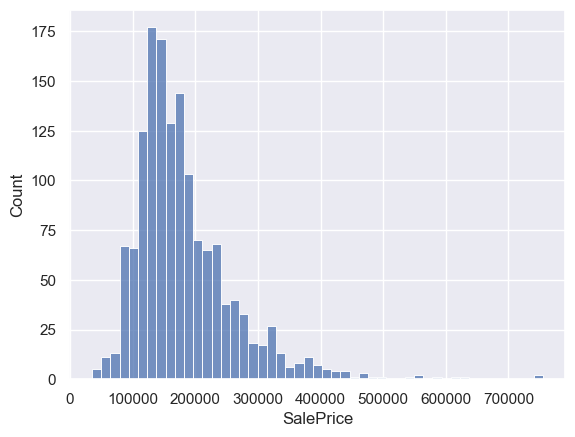

In [218]:
import seaborn as sns
sns.histplot(df['SalePrice']);

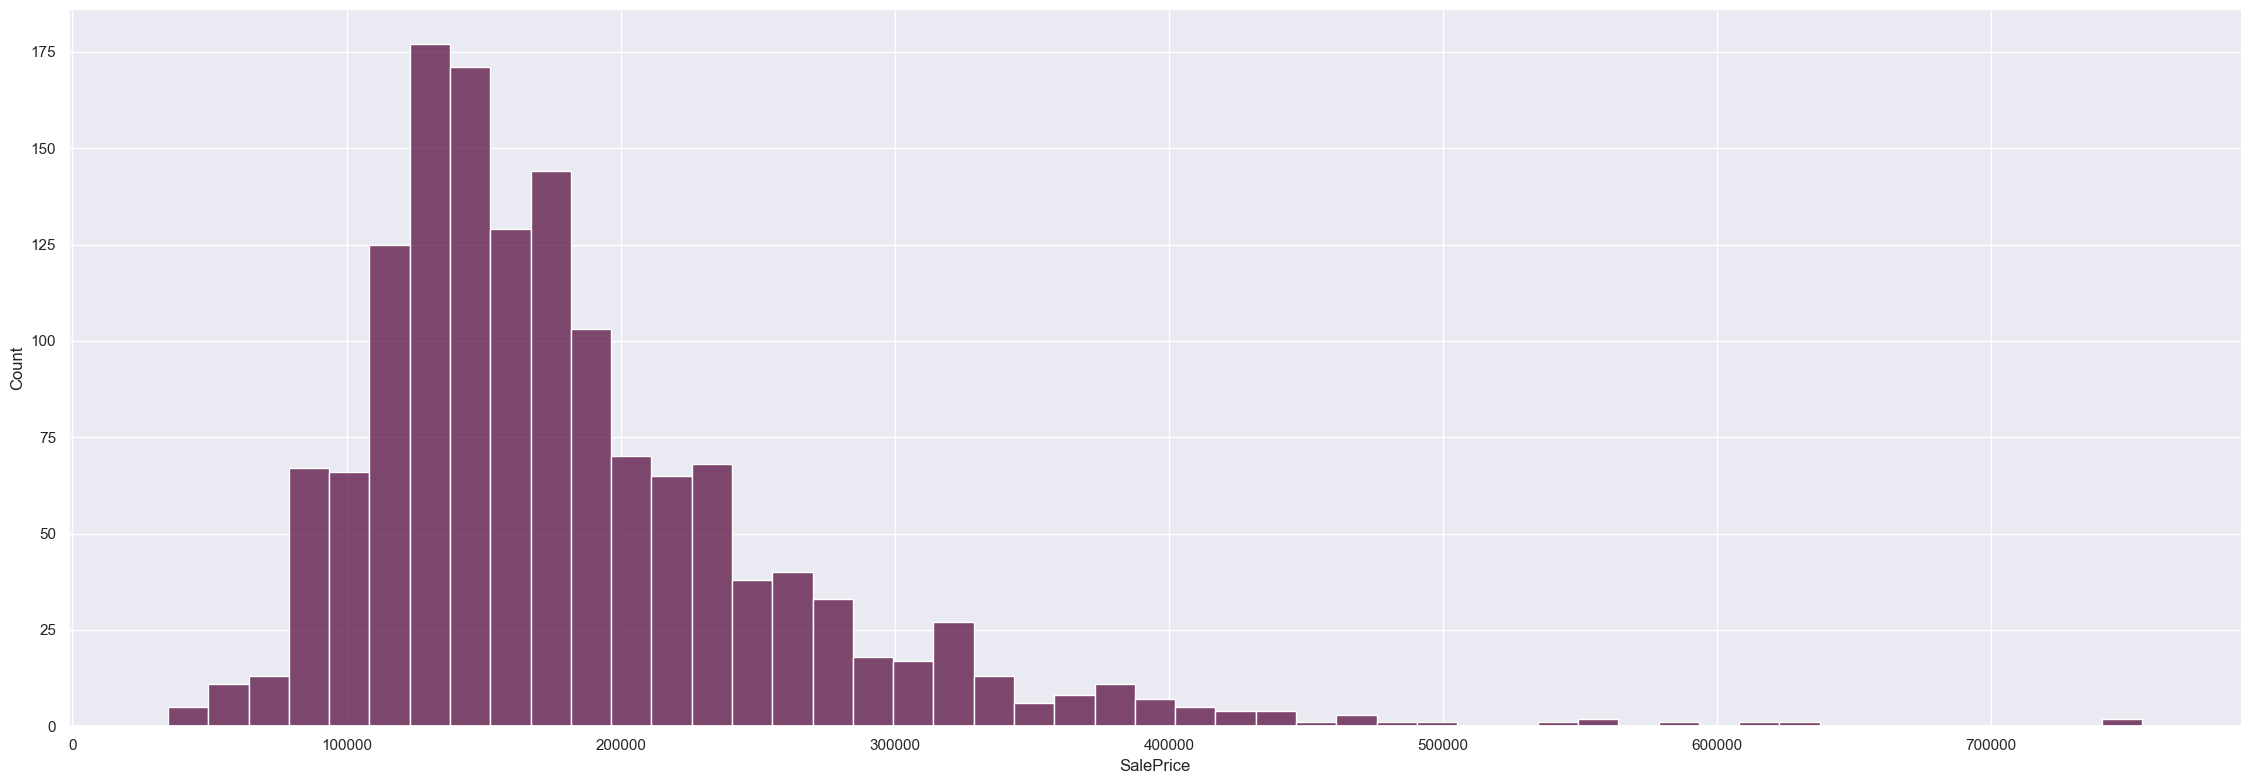

In [219]:
sns.displot(df['SalePrice'], height=8, aspect=17/6, color='xkcd:plum', edgecolor='w')

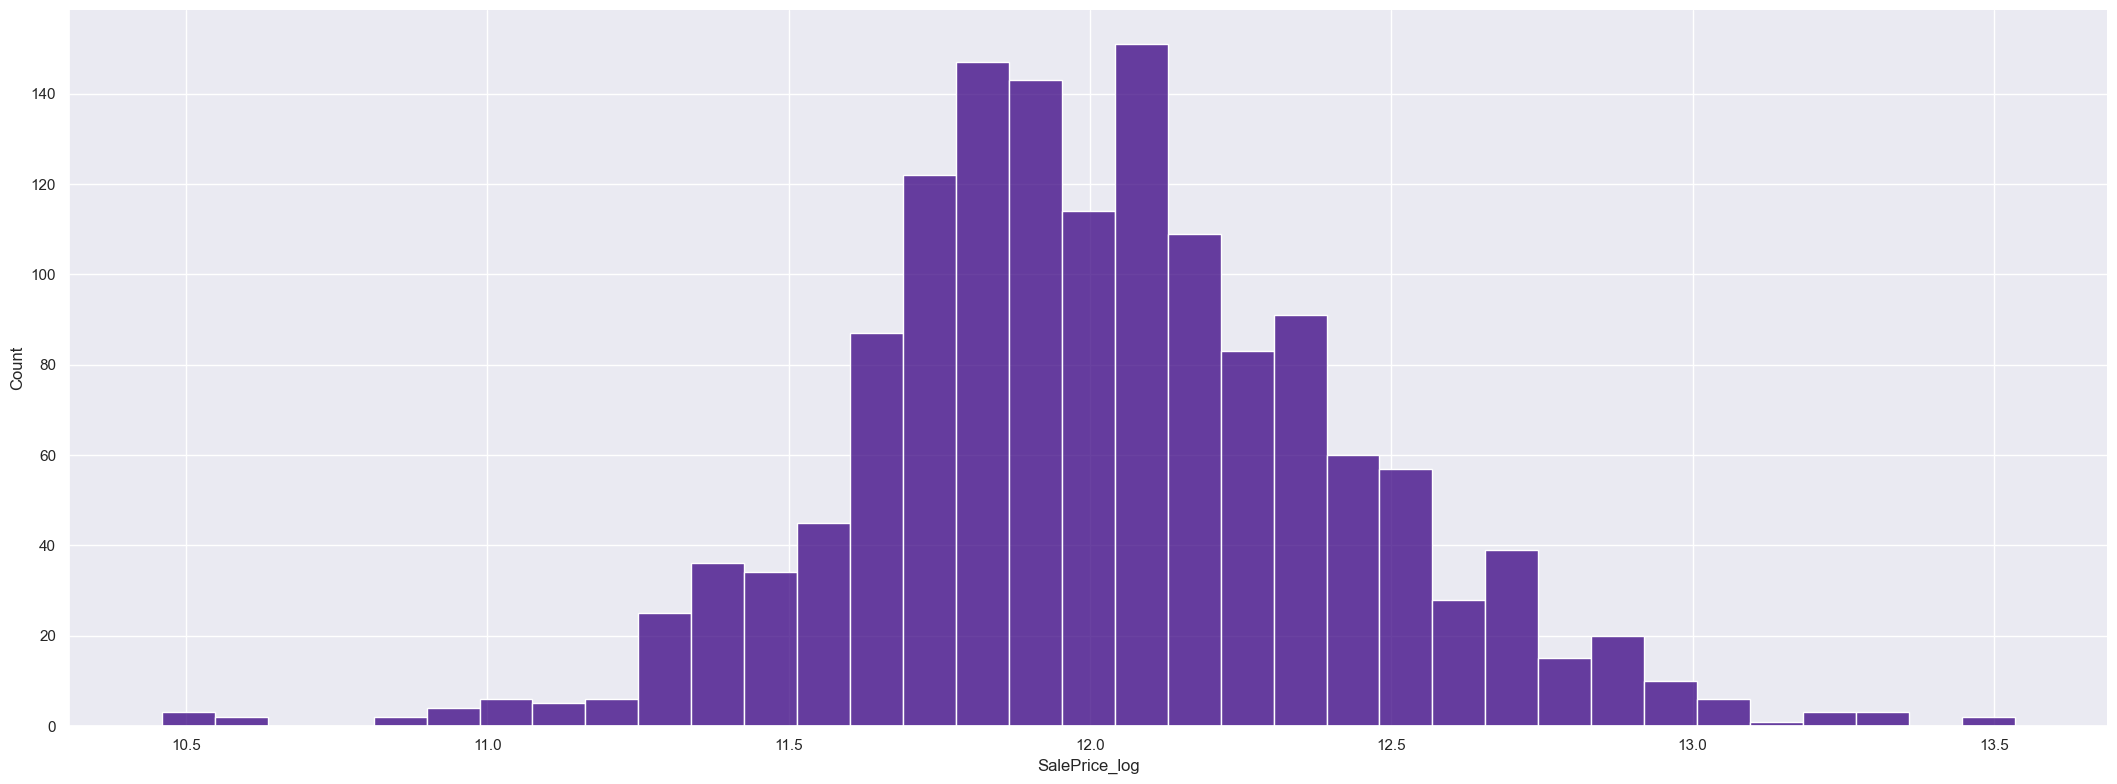

In [220]:
df['SalePrice_log'] = np.log(df['SalePrice'])
sns.displot(df['SalePrice_log'], height=8, aspect=16/6, color='xkcd:indigo', edgecolor='w')

In [221]:
df["SalePrice_log"].skew()

0.12131775882415026

In [222]:
df["SalePrice_log"].kurt()

0.806927847502148

# Problem 7: Confirming the correlation coefficient

In [223]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()
corr

,Id,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,SalePrice_log
Id,1.000000,0.010589,-0.033170,-0.027553,0.013167,-0.013945,-0.023158,-0.004001,-0.005668,-0.007508,...,0.000267,0.003272,-0.046550,0.001617,0.057163,-0.006155,0.021708,0.000566,-0.021756,-0.017969
MSSubClass,0.010589,1.000000,-0.139766,0.032936,-0.059134,0.027435,0.040199,-0.069501,-0.065549,-0.140627,...,-0.005838,-0.011904,-0.043786,-0.025932,0.008309,-0.007651,-0.013404,-0.021461,-0.084230,-0.073971
LotArea,-0.033170,-0.139766,1.000000,0.105786,-0.005665,0.014296,0.013852,0.214121,0.111158,-0.002641,...,0.084751,-0.018360,0.020417,0.043147,0.077669,0.038063,0.001179,-0.014254,0.263837,0.257321
OverallQual,-0.027553,0.032936,0.105786,1.000000,-0.092243,0.573334,0.551605,0.239265,-0.059291,0.308018,...,0.308554,-0.114162,0.030314,0.064755,0.065143,-0.031461,0.070570,-0.027277,0.791069,0.817368
OverallCond,0.013167,-0.059134,-0.005665,-0.092243,1.000000,-0.375780,0.074158,-0.046595,0.040132,-0.137008,...,-0.032847,0.070238,0.025465,0.054721,-0.002009,0.068752,-0.003685,0.044003,-0.077924,-0.036867
YearBuilt,-0.013945,0.027435,0.014296,0.573334,-0.375780,1.000000,0.592512,0.250465,-0.048903,0.149444,...,0.189359,-0.387177,0.031461,-0.050175,0.005006,-0.034330,0.012791,-0.013733,0.523273,0.586827
YearRemodAdd,-0.023158,0.040199,0.013852,0.551605,0.074158,0.592512,1.000000,0.129259,-0.067575,0.181520,...,0.226944,-0.193740,0.045389,-0.038558,0.005882,-0.010226,0.021860,0.035656,0.507430,0.565822
BsmtFinSF1,-0.004001,-0.069501,0.214121,0.239265,-0.046595,0.250465,0.129259,1.000000,-0.050328,-0.495718,...,0.111346,-0.102581,0.026382,0.061862,0.140491,0.003514,-0.016060,0.014456,0.386436,0.372152
BsmtFinSF2,-0.005668,-0.065549,0.111158,-0.059291,0.040132,-0.048903,-0.067575,-0.050328,1.000000,-0.209395,...,0.002954,0.036475,-0.030017,0.088823,0.041697,0.004923,-0.015309,0.031734,-0.011412,0.004835
BsmtUnfSF,-0.007508,-0.140627,-0.002641,0.308018,-0.137008,0.149444,0.181520,-0.495718,-0.209395,1.000000,...,0.128835,-0.002640,0.020732,-0.012657,-0.035114,-0.023863,0.034754,-0.041221,0.214446,0.222001


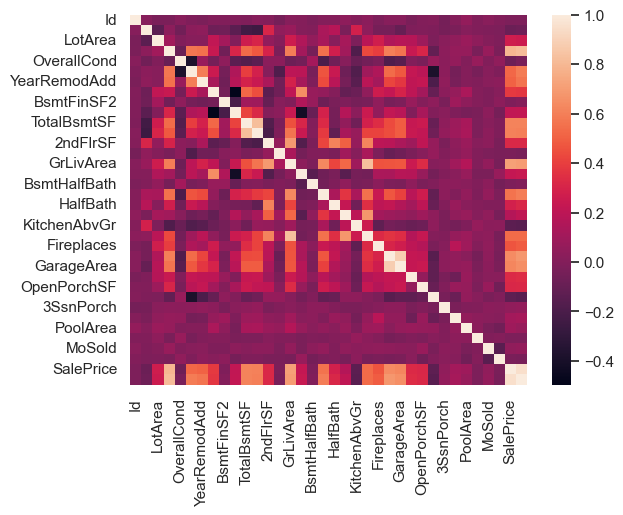

In [224]:
sns.heatmap(corr, annot = False)
sns.set()

In [225]:
corr_10 = corr['SalePrice'].sort_values(ascending=False)
corr_10 = corr_10[1:11]
corr_10

SalePrice_log    0.948384
OverallQual      0.791069
GrLivArea        0.708618
GarageCars       0.640473
GarageArea       0.623423
TotalBsmtSF      0.613905
1stFlrSF         0.605968
FullBath         0.560881
TotRmsAbvGrd     0.533779
YearBuilt        0.523273
Name: SalePrice, dtype: float64

In [226]:
target_matrix = df[corr_10[1:11].index]
target_matrix

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
0,7,1710,2,548,856,856,2,8,2003
1,6,1262,2,460,1262,1262,2,6,1976
2,7,1786,2,608,920,920,2,6,2001
3,7,1717,3,642,756,961,1,7,1915
4,8,2198,3,836,1145,1145,2,9,2000
...,...,...,...,...,...,...,...,...,...
1455,6,1647,2,460,953,953,2,7,1999
1456,6,2073,2,500,1542,2073,2,7,1978
1457,7,2340,1,252,1152,1188,2,9,1941
1458,5,1078,1,240,1078,1078,1,5,1950


In [227]:
target_matrix.corr()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt
OverallQual,1.000000,0.593021,0.600991,0.561980,0.537523,0.475933,0.551267,0.427720,0.573334
GrLivArea,0.593021,1.000000,0.467321,0.468971,0.455001,0.566084,0.630283,0.825576,0.199286
GarageCars,0.600991,0.467321,1.000000,0.882613,0.435279,0.439726,0.469619,0.362248,0.537866
GarageArea,0.561980,0.468971,0.882613,1.000000,0.486719,0.489741,0.405944,0.337915,0.479460
TotalBsmtSF,0.537523,0.455001,0.435279,0.486719,1.000000,0.819393,0.324886,0.286125,0.393159
1stFlrSF,0.475933,0.566084,0.439726,0.489741,0.819393,1.000000,0.381438,0.409901,0.283056
FullBath,0.551267,0.630283,0.469619,0.405944,0.324886,0.381438,1.000000,0.554759,0.467960
TotRmsAbvGrd,0.427720,0.825576,0.362248,0.337915,0.286125,0.409901,0.554759,1.000000,0.095401
YearBuilt,0.573334,0.199286,0.537866,0.479460,0.393159,0.283056,0.467960,0.095401,1.000000


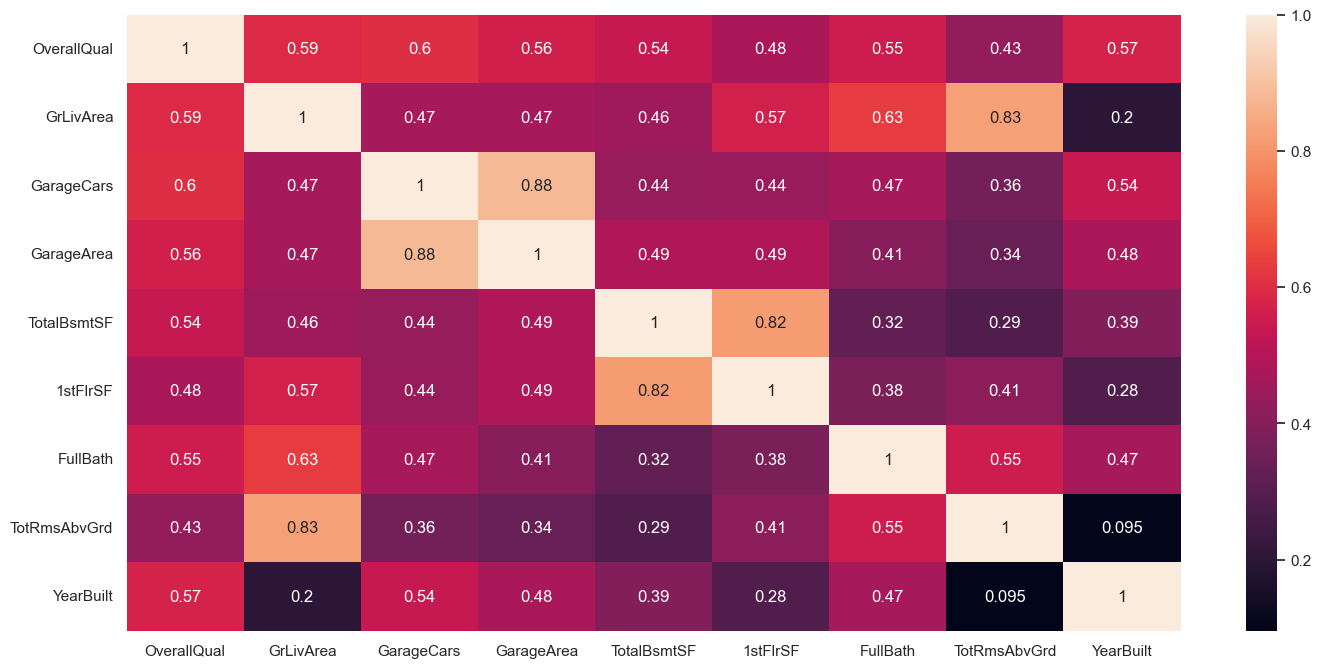

In [235]:
plt.subplots(figsize=(17,8))
sns.heatmap(target_matrix.corr(), annot = True)
sns.set()

The 10 features from Kaggle’s DataDescription mainly reflect property size, quality, and amenities. These include structural quality (OverallQual), living space (GrLivArea, TotalBsmtSF, 1stFlrSF), garage capacity/size (GarageCars, GarageArea), number of rooms/bathrooms (TotRmsAbvGrd, FullBath), and construction year (YearBuilt). All are strongly linked to SalePrice, highlighting key drivers of property value.

High-Correlation feature combination:
-  GarageCars ↔ GarageArea $= 0.88$
-  GrLivArea ↔ TotRmsAbvGrd $= 0.83$
-  TotalBsmtSF ↔ 1stFlrSF $= 0.82$

